Explore the bash history of this computer
========

Load the bash history on this computer

In [4]:
from os.path import expanduser
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

def counts_of(corpus, ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    matrix = vectorizer.fit_transform(corpus)
    counts = matrix.toarray().sum(axis=0)
    words = vectorizer.get_feature_names()
    return zip(words, counts)

home = expanduser("~")
with (open(home + "/.bash_history")) as f:
    history = f.read()
    corpus = history.split('\n')
    unigram_count = counts_of(corpus, (1,1))
    bigram_count = counts_of(corpus, (2,2))

In [5]:
def plot_histogram_of(words):
    sorted_word_count = sorted(words, key = lambda x: -x[1])
    top = sorted_word_count[:10]
    top_words = list(map(lambda x: x[0], top))
    top_counts = list(map(lambda x: x[1], top))
    _ = plt.bar(top_words, top_counts) 
    plt.xticks(rotation='vertical')
    plt.title("Most popular CLI n-grams")
    plt.show()
    

The entropy of the unigrams in the corpus:

In [6]:
from scipy.stats import entropy

words, counts = zip(*unigram_count)
total = sum(counts)
ps = map(lambda x: x / total, counts)
print(entropy(list(ps)))

5.4635668853298895


The most popular unigrams are:

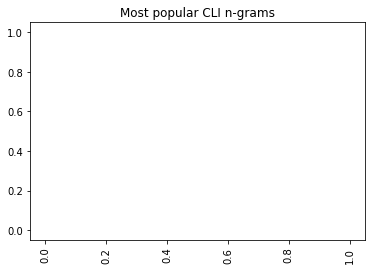

In [7]:
plot_histogram_of(unigram_count)

The most popular bigrams are:

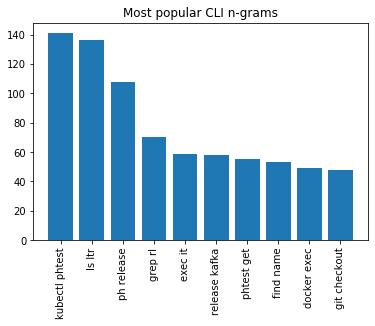

In [8]:
plot_histogram_of(bigram_count)